In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concertriccir2/concertriccir2.csv


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [9]:
df = pd.read_csv('/kaggle/input/concertriccir2/concertriccir2.csv')
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


This section renames the columns of the dataset to more understandable names,

where 'X' and 'Y' represent the features and 'class' represents the target variable.

This helps in making the dataset easier to work with for further analysis or modeling tasks.

In [10]:
column_new = {
    '7.003345706103683010e-01' : 'X',
    '-2.470675778972781789e-01' : 'Y',
    '0.000000000000000000e+00' : 'class'
}
df = df.rename(columns=column_new)
df.head()

,X,Y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


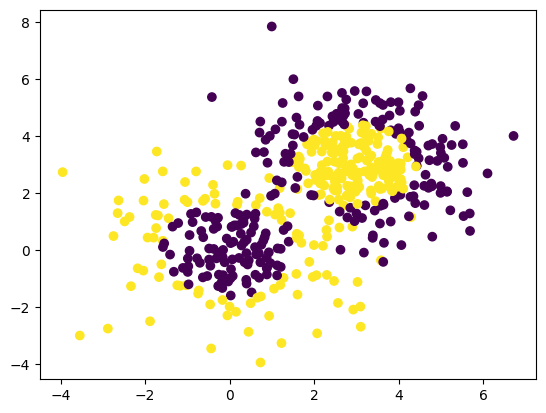

In [11]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [12]:
X= df.iloc[:, 0:2].values
y= df.iloc[:, -1].values

In [13]:
# Display basic statistics
print(df.describe())

# Display the distribution of the target class
print(df['class'].value_counts())


                X           Y       class
count  499.000000  499.000000  499.000000
mean     1.886078    1.874116    0.501002
std      1.932484    1.986577    0.500501
min     -3.950019   -3.935098    0.000000
25%      0.403288    0.433397    0.000000
50%      2.204484    2.115254    1.000000
75%      3.349258    3.391114    1.000000
max      6.712027    7.848278    1.000000
class
1.0    250
0.0    249
Name: count, dtype: int64


In [14]:
df.info

<bound method DataFrame.info of             X         Y  class
0   -3.950019  2.740080    1.0
1    0.150222 -2.157638    1.0
2   -1.672050 -0.941519    1.0
3    2.560483 -1.846577    1.0
4   -1.724979  3.463930    1.0
..        ...       ...    ...
494  2.177895  2.984489    1.0
495  1.778905  2.869205    1.0
496  0.894180  3.069959    0.0
497  0.849439  3.875435    0.0
498  5.217443  1.400818    0.0

[499 rows x 3 columns]>

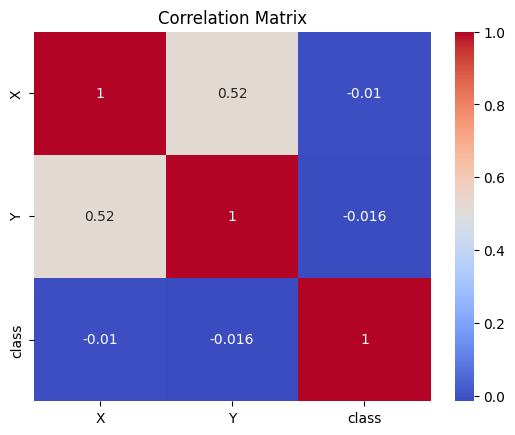

In [15]:
import seaborn as sns

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

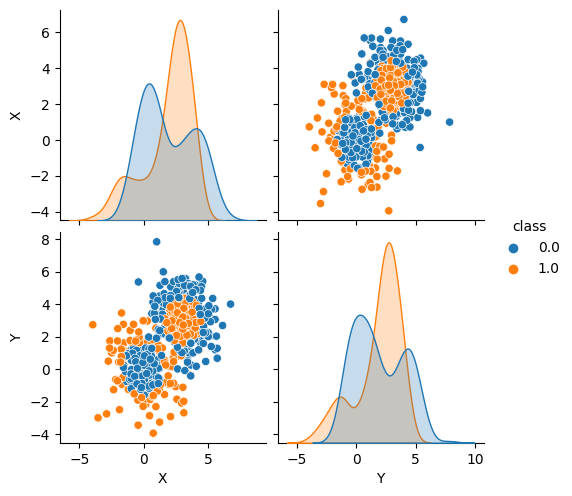

In [16]:
# Pairplot to see the distribution and scatter relationships
sns.pairplot(df, hue='class', diag_kind='kde')
plt.show()


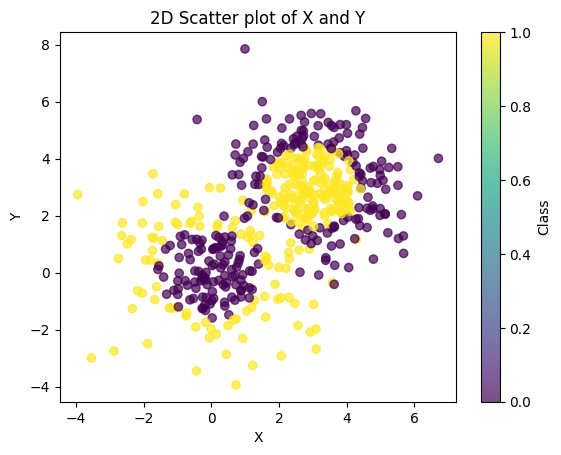

In [17]:
# Scatter plot with a color map
plt.scatter(df['X'], df['Y'], c=df['class'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Class')
plt.title('2D Scatter plot of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [20]:
model = Sequential()

model.add(Dense(4, activation='relu', input_dim=2))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,y, epochs = 200, validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4722 - loss: 0.6932 - val_accuracy: 0.4300 - val_loss: 0.6933
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4934 - loss: 0.6931 - val_accuracy: 0.4300 - val_loss: 0.6935
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5352 - loss: 0.6930 - val_accuracy: 0.4300 - val_loss: 0.6937
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4814 - loss: 0.6933 - val_accuracy: 0.4300 - val_loss: 0.6937
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.4300 - val_loss: 0.6939
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5712 - loss: 0.6924 - val_accuracy: 0.4300 - val_loss: 0.6943
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5266 - loss: 0.6928 - val_accuracy: 0.4300 - val_loss: 0.6942
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5322 - loss: 0.6927 - val_accuracy: 0.4300 - 

2nd model

In [22]:
model1 = Sequential()

model1.add(Dense(2, activation='relu', input_dim=2))
model1.add(Dense(2, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model1.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(X,y, epochs = 200, validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5309 - loss: 0.7239 - val_accuracy: 0.4300 - val_loss: 0.9172
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5379 - loss: 0.7123 - val_accuracy: 0.4300 - val_loss: 0.8764
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5277 - loss: 0.7381 - val_accuracy: 0.4300 - val_loss: 0.8440
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5812 - loss: 0.7021 - val_accuracy: 0.4400 - val_loss: 0.8227
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6036 - loss: 0.6978 - val_accuracy: 0.4500 - val_loss: 0.8057
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5704 - loss: 0.6967 - val_accuracy: 0.4700 - val_loss: 0.7905
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5512 - loss: 0.7066 - val_accuracy: 0.5000 - val_loss: 0.7798
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5406 - loss: 0.6908 - val_accuracy: 0.5100 - 

# model 3 with Batch Normalization

In [24]:
model3 = Sequential()

model3.add(Dense(4, activation='relu', input_dim=2))
model3.add(BatchNormalization())
model3.add(Dense(4, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(4, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(1, activation = 'sigmoid'))

model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 24 (96.00 B)

In [25]:
model3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(X,y, epochs = 200, validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4137 - loss: 0.8210 - val_accuracy: 0.5100 - val_loss: 0.6938
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5653 - loss: 0.7038 - val_accuracy: 0.4100 - val_loss: 0.6893
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5548 - loss: 0.7113 - val_accuracy: 0.5700 - val_loss: 0.6856
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.6798 - val_accuracy: 0.5600 - val_loss: 0.6839
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6396 - loss: 0.6578 - val_accuracy: 0.5600 - val_loss: 0.6822
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6434 - loss: 0.6620 - val_accuracy: 0.5600 - val_loss: 0.6806
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6437 - loss: 0.6439 - val_accuracy: 0.5600 - val_loss: 0.6785
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6538 - loss: 0.6478 - val_accuracy: 0.5600 - 

# model 4 with Batch Normalization

In [26]:
model4 = Sequential()

model4.add(Dense(2, activation='relu', input_dim=2))
model4.add(BatchNormalization())
model4.add(Dense(2, activation = 'relu'))
model4.add(BatchNormalization())
model4.add(Dense(1, activation = 'sigmoid'))

model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 23 (92.00 B)

 Non-trainable params: 8 (32.00 B)

In [27]:
model4.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history4 = model4.fit(X,y, epochs = 200, validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5088 - loss: 0.9236 - val_accuracy: 0.5600 - val_loss: 1.2994
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5002 - loss: 0.8876 - val_accuracy: 0.5300 - val_loss: 1.1102
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5125 - loss: 0.9119 - val_accuracy: 0.5000 - val_loss: 0.9803
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5465 - loss: 0.8606 - val_accuracy: 0.4900 - val_loss: 0.8898
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5292 - loss: 0.8508 - val_accuracy: 0.4700 - val_loss: 0.8243
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5206 - loss: 0.8757 - val_accuracy: 0.4500 - val_loss: 0.7740
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5489 - loss: 0.8470 - val_accuracy: 0.4400 - val_loss: 0.7379
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5133 - loss: 0.8514 - val_accuracy: 0.4000 - 

# Checking Accuracy of four different models

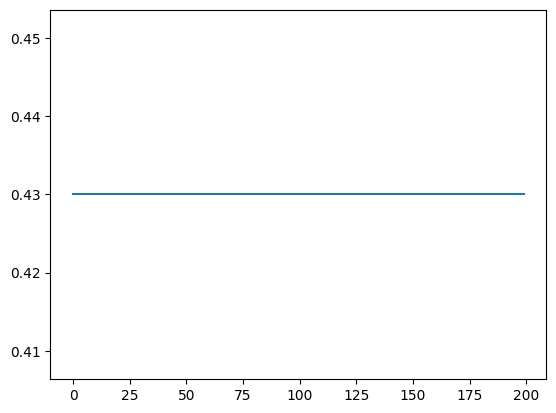

In [28]:
plt.plot(history.history['val_accuracy'])

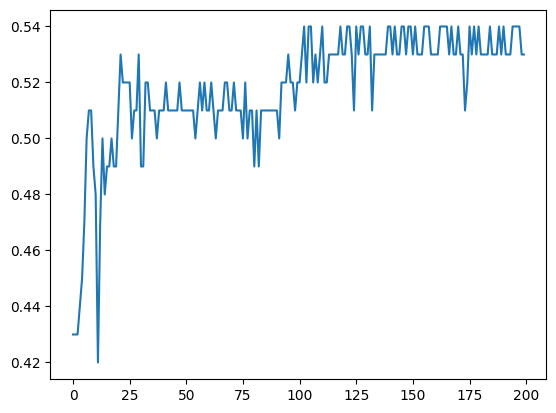

In [29]:
plt.plot(history1.history['val_accuracy'])

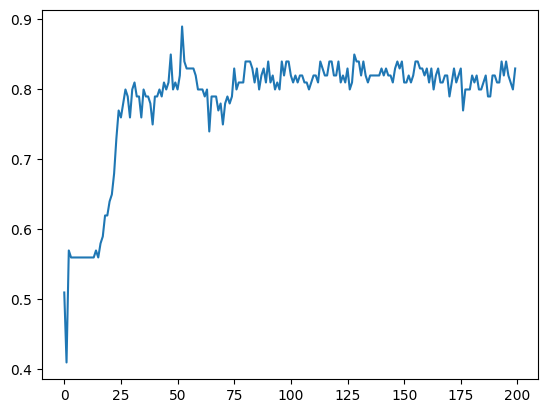

In [30]:
plt.plot(history3.history['val_accuracy'])

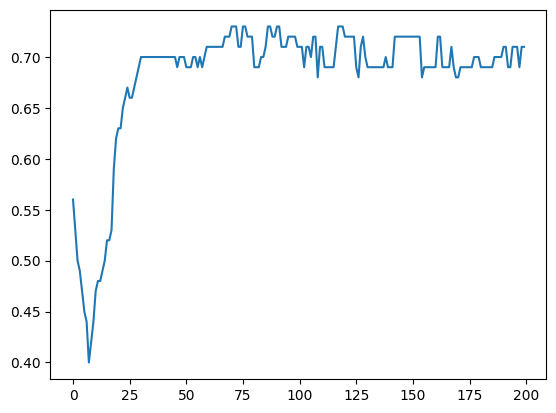

In [31]:
plt.plot(history4.history['val_accuracy'])

# comparing

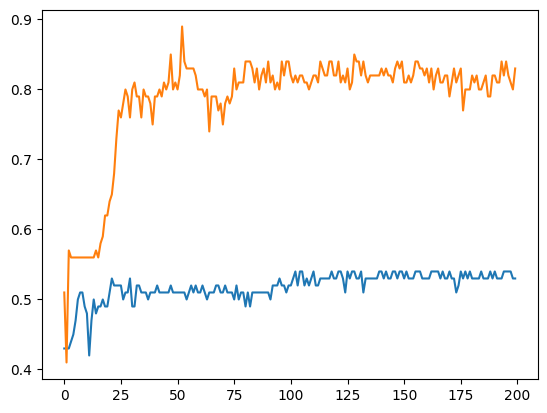

In [32]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])

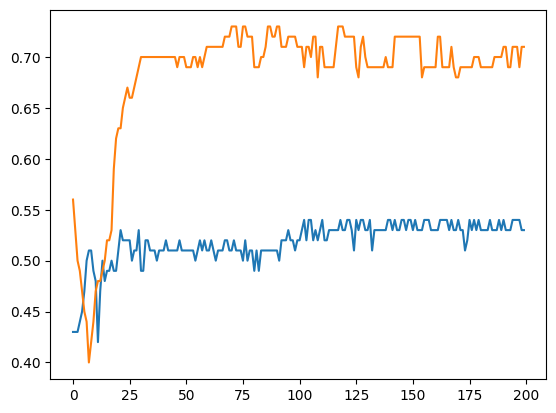

In [33]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])

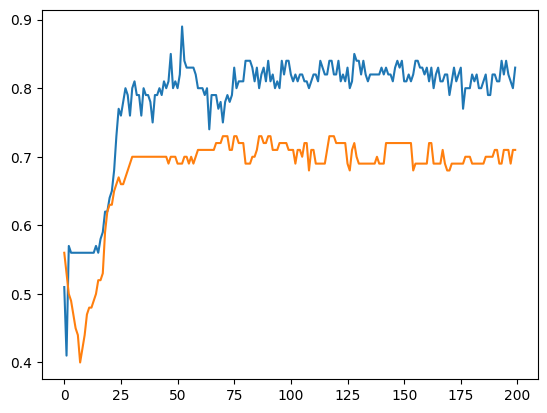

In [34]:
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 964us/step


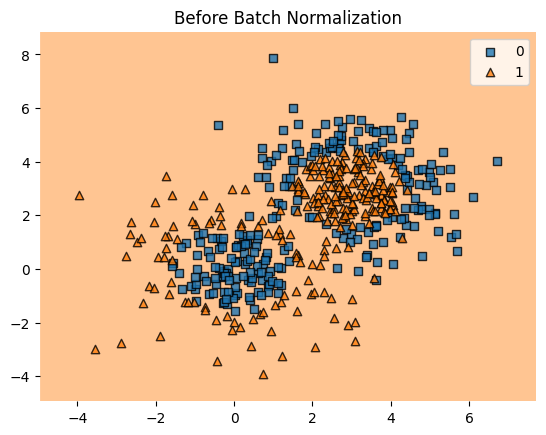

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.title('Before Batch Normalization')
plt.legend()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 819us/step


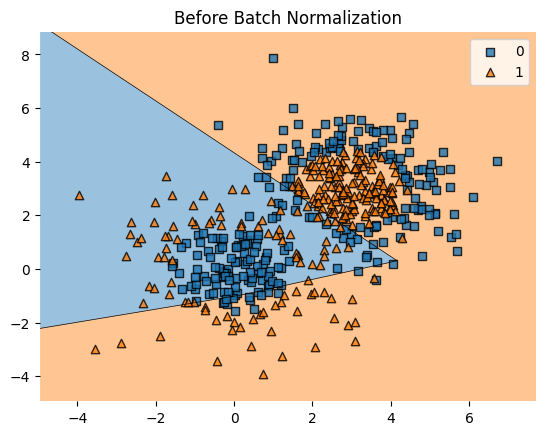

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)
plt.title('Before Batch Normalization')
plt.legend()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


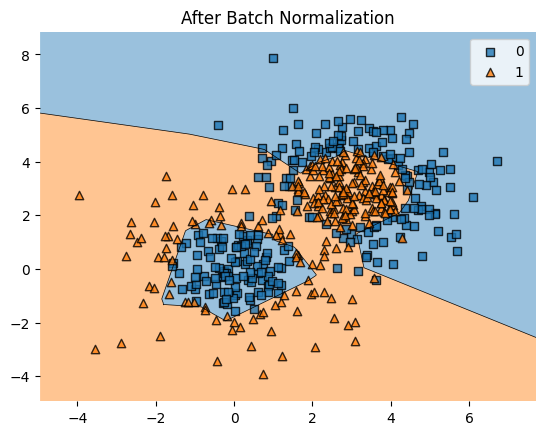

In [38]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model3, legend=2)
plt.title('After Batch Normalization')
plt.legend()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 877us/step


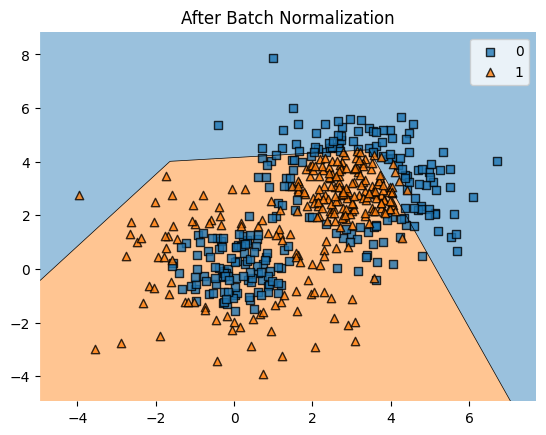

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model4, legend=2)
plt.title('After Batch Normalization')
plt.legend()